## Data

[Data File](https://www.kaggle.com/zynicide/wine-reviews)

## 1) Environment Setup & Code Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
wine_file = 'data/winemag-data-130k-v2.csv'
wine = pd.read_csv(wine_file)

In [3]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
# We have an 'unnamed:0 column' that appears to just be 
# the index - check with .tail()
wine.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [5]:
# Change the index to just be this column - index_col attribute
# https://pandas.pydata.org/pandas-docs/stable/
# generated/pandas.read_csv.html
wine = pd.read_csv(wine_file, index_col=0)
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## 2) Basic Exploration & Cleaning

In [6]:
wine.shape

(129971, 13)

In [7]:
# Check number of duplicate rows
len(wine[wine.duplicated()])

9983

In [8]:
# Get rid of duplicates and verify
wine_unique = wine.drop_duplicates().copy()

In [9]:
len(wine_unique[wine_unique.duplicated()])

0

In [10]:
wine_unique.shape

(119988, 13)

In [11]:
# Get the vintages from the titles
# integer extraction from: 
# https://stackoverflow.com/questions/37683558/
# pandas-extract-number-from-string
wine_unique['vintage'] = wine_unique['title'].str.extract('(\d{4})')

In [12]:
# Check that we have the new 'vintage' column
wine_unique.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [13]:
# check datatype
wine_unique.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
vintage                   object
dtype: object

In [14]:
# The fact that the 'vintage' column is 'object' type is OK because it is 
# a categorical variable
# Check what vintage values we got
set(wine_unique['vintage'])

{'1000',
 '1070',
 '1150',
 '1492',
 '1503',
 '1607',
 '1621',
 '1637',
 '1752',
 '1789',
 '1821',
 '1827',
 '1840',
 '1845',
 '1847',
 '1848',
 '1850',
 '1852',
 '1856',
 '1860',
 '1868',
 '1870',
 '1872',
 '1875',
 '1877',
 '1882',
 '1887',
 '1898',
 '1904',
 '1912',
 '1919',
 '1927',
 '1929',
 '1934',
 '1935',
 '1941',
 '1945',
 '1947',
 '1952',
 '1957',
 '1961',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1973',
 '1974',
 '1976',
 '1978',
 '1980',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '3000',
 '7200',
 nan}

In [15]:
# Check the *strange* vintage entries
wine_unique[(wine_unique['vintage'].astype('float64') < 1900) | (wine_unique['vintage'].astype('float64') > 2100)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
339,Spain,"Red in color, with berry and apple aromas, thi...",1887 Rosado,82,13.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Cavas Hill NV 1887 Rosado Sparkling (Cava),Sparkling Blend,Cavas Hill,1887
1012,Italy,This ruby-hued blend of Nerello Mascalese and ...,Pietralava,88,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Antichi Vinai 1877 2013 Pietralava Red (Etna),Red Blend,Antichi Vinai 1877,1877
2135,Spain,Clover and apple aromas are basic but fresh. T...,Reserva Cuvée Barcelona 1872,85,NaN,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Codorníu NV Reserva Cuvée Barcelona 1872 Spark...,Sparkling Blend,Codorníu,1872
2262,Italy,One of Italy's most interesting and least-know...,Canua,87,40.0,Lombardy,Valtellina Superiore,NaN,NaN,NaN,Salis 1637 2002 Canua (Valtellina Superiore),Nebbiolo,Salis 1637,1637
2634,Italy,"Merlot (70%), Cabernet Sauvignon and Petit Ver...",Ruit Hora,90,NaN,Tuscany,Bolgheri,NaN,NaN,NaN,Caccia al Piano 1868 2009 Ruit Hora (Bolgheri),Red Blend,Caccia al Piano 1868,1868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124822,Spain,"This Tempranillo is loaded up front, with berr...",Campo Lindo Tradicional,88,12.0,Catalonia,Catalunya,NaN,Michael Schachner,@wineschach,Bodegas 1898 2011 Campo Lindo Tradicional Temp...,Tempranillo,Bodegas 1898,1898
127114,Argentina,Rather bland and done up with butterscotch and...,NaN,83,20.0,Mendoza Province,Tupungato,NaN,Michael Schachner,@wineschach,Ikal 1150 2007 Chardonnay (Tupungato),Chardonnay,Ikal 1150,1150
128565,US,Yellow cherry and blossom notes soften the bra...,Dry,87,17.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Hazlitt 1852 Vineyards 2013 Dry Riesling (Fing...,Riesling,Hazlitt 1852 Vineyards,1852
129081,Italy,"This wine opens with forest fruit, chopped her...",Agoghè,87,18.0,Tuscany,Toscana,NaN,NaN,NaN,Donna Olimpia 1898 2011 Agoghè Rosato (Toscana),Rosato,Donna Olimpia 1898,1898


In [16]:
set(wine_unique['vintage'])

{'1000',
 '1070',
 '1150',
 '1492',
 '1503',
 '1607',
 '1621',
 '1637',
 '1752',
 '1789',
 '1821',
 '1827',
 '1840',
 '1845',
 '1847',
 '1848',
 '1850',
 '1852',
 '1856',
 '1860',
 '1868',
 '1870',
 '1872',
 '1875',
 '1877',
 '1882',
 '1887',
 '1898',
 '1904',
 '1912',
 '1919',
 '1927',
 '1929',
 '1934',
 '1935',
 '1941',
 '1945',
 '1947',
 '1952',
 '1957',
 '1961',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1973',
 '1974',
 '1976',
 '1978',
 '1980',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '3000',
 '7200',
 nan}

In [17]:
# The extra numbers are comming from the 'winery' column data (years in the winery name)
# overwrite these values with values that account for this
# assign '.apply' statements to new columns from: 
# https://stackoverflow.com/questions/30276745/
# change-series-inplace-in-dataframe-after-applying-function-on-it
wine_unique['vintage_str_data'] = wine_unique.apply(lambda x: x['title'][len(x['winery']):], axis=1)

In [18]:
wine_unique['vintage_str_data']

0                                 2013 Vulkà Bianco  (Etna)
1                                 2011 Avidagos Red (Douro)
2                       2013 Pinot Gris (Willamette Valley)
3          2013 Reserve Late Harvest Riesling (Lake Mich...
4          2012 Vintner's Reserve Wild Child Block Pinot...
                                ...                        
129966     2013 Brauneberger Juffer-Sonnenuhr Spätlese R...
129967                             2004 Pinot Noir (Oregon)
129968                   2013 Kritt Gewurztraminer (Alsace)
129969                             2012 Pinot Gris (Alsace)
129970     2012 Lieu-dit Harth Cuvée Caroline Gewurztram...
Name: vintage_str_data, Length: 119988, dtype: object

In [19]:
# Now overwrite the 'vintage' column with new vintage values
wine_unique['vintage'] = wine_unique['vintage_str_data'].str.extract('(\d{4})')

In [20]:
# Verify that the dates look more correct
set(wine_unique['vintage'])

{'1503',
 '1607',
 '1821',
 '1827',
 '1847',
 '1868',
 '1872',
 '1882',
 '1887',
 '1904',
 '1919',
 '1927',
 '1934',
 '1935',
 '1941',
 '1945',
 '1947',
 '1952',
 '1957',
 '1961',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1973',
 '1974',
 '1976',
 '1978',
 '1980',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 nan}

In [21]:
#Check the lowest year values
wine_unique[wine_unique['vintage'].astype('float64') < 1930]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage,vintage_str_data
339,Spain,"Red in color, with berry and apple aromas, thi...",1887 Rosado,82,13.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Cavas Hill NV 1887 Rosado Sparkling (Cava),Sparkling Blend,Cavas Hill,1887,NV 1887 Rosado Sparkling (Cava)
2135,Spain,Clover and apple aromas are basic but fresh. T...,Reserva Cuvée Barcelona 1872,85,NaN,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Codorníu NV Reserva Cuvée Barcelona 1872 Spark...,Sparkling Blend,Codorníu,1872,NV Reserva Cuvée Barcelona 1872 Sparkling (Cava)
19136,Spain,"A spectacularly sweet and rich bruiser, and on...",Pedro Ximenez 1827 Sweet Sherry,94,14.0,Andalucia,Jerez,NaN,Michael Schachner,@wineschach,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry,Osborne,1827,NV Pedro Ximenez 1827 Sweet Sherry Sherry (Je...
20134,Spain,"Yeasty, candied aromas rest in front of a foam...",1887 Brut,84,13.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Cavas Hill NV 1887 Brut Sparkling (Cava),Sparkling Blend,Cavas Hill,1887,NV 1887 Brut Sparkling (Cava)
23333,Spain,"Aromas of orange, cantaloupe and creamy yeast ...",Reserva Cuvée Barcelona 1872 Rosé,87,22.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Codorníu NV Reserva Cuvée Barcelona 1872 Rosé ...,Sparkling Blend,Codorníu,1872,NV Reserva Cuvée Barcelona 1872 Rosé Sparklin...
39897,Spain,"Pretty in color, with a clean nose that's not ...",MM Masia 1882 Selección Especial Brut Rosé,87,10.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Mas de Monistrol NV MM Masia 1882 Selección Es...,Sparkling Blend,Mas de Monistrol,1882,NV MM Masia 1882 Selección Especial Brut Rosé...
41914,England,Aromatic overtones of meadow flowers with just...,Balfour 1503 Classic Cuvée,89,NaN,England,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Hush Heath Estate NV Balfour 1503 Classic Cuvé...,Sparkling Blend,Hush Heath Estate,1503,NV Balfour 1503 Classic Cuvée Sparkling (Engl...
42594,Italy,"Easy and bright, this is a great summer sipper...",Cuvèe 1821 Brut,86,15.0,Veneto,Prosecco,NaN,NaN,NaN,Zonin NV Cuvèe 1821 Brut (Prosecco),Glera,Zonin,1821,NV Cuvèe 1821 Brut (Prosecco)
43085,Italy,Vintner Gianni Zonin was instrumental in pushi...,Cuvèe 1821,85,15.0,Veneto,Prosecco,NaN,NaN,NaN,Zonin NV Cuvèe 1821 (Prosecco),Glera,Zonin,1821,NV Cuvèe 1821 (Prosecco)
54748,Spain,"A rank well above most PX sweeties, with lush ...",Solera 1927,94,25.0,Andalucia,Montilla-Moriles,NaN,Michael Schachner,@wineschach,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,Pedro Ximénez,Alvear,1927,NV Solera 1927 Pedro Ximénez (Montilla-Moriles)


In [22]:
# Data appears to now have correct vinatage

In [23]:
# Now check the null entries
wine_unique[wine_unique['vintage'].isnull() == True]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage,vintage_str_data
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,NaN,NV Brut Rosé (Champagne)
69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,NaN,NV Brut Rosé (Champagne)
237,Italy,The wine boasts a beautiful appearance thanks ...,NaN,85,18.0,Central Italy,San Marino,NaN,NaN,NaN,Consorzio Vini Tipici di San Marino NV Moscato...,Moscato,Consorzio Vini Tipici di San Marino,NaN,NV Moscato (San Marino)
315,Italy,"Honey, almond blossom and citrus zest are foll...",Extra Dry,86,15.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,NaN,Bellussi NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Bellussi,NaN,NV Extra Dry (Prosecco di Valdobbiadene)
326,Italy,Drying mineral tones face off with luscious pe...,Extra Dry,86,15.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,NaN,Marsuret NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Marsuret,NaN,NV Extra Dry (Prosecco di Valdobbiadene)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129706,US,"Mostly Pinot Noir, with a few drops of Chardon...",VA de VI Ultra Cuvée,87,24.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV VA de VI Ultra Cuvée Sparklin...,Sparkling Blend,Gloria Ferrer,NaN,NV VA de VI Ultra Cuvée Sparkling (Sonoma Cou...
129719,France,In order to maintain freshness and crispness i...,Domaine Vieilles Vignes Brut,90,49.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Bruno Gobillard NV Domaine Vieilles Vignes Bru...,Champagne Blend,Bruno Gobillard,NaN,NV Domaine Vieilles Vignes Brut (Champagne)
129743,France,"Crisp and fruity, this mature-tasting wine has...",Réserve Brut,90,70.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Castelnau NV Réserve Brut (Champagne),Champagne Blend,Castelnau,NaN,NV Réserve Brut (Champagne)
129869,US,"This wine hits the mark, combining intriguing ...",Brut,90,25.0,California,California,California Other,Jim Gordon,@gordone_cellars,Biltmore Estate NV Brut Sparkling (California),Sparkling Blend,Biltmore Estate,NaN,NV Brut Sparkling (California)


In [24]:
# Null values do in-fact not have a vintage - this is a category unto itself that we will clean up

In [25]:
wine_unique.isnull().sum()

country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
vintage                   4270
vintage_str_data             0
dtype: int64

In [26]:
# A lot of nulls - check what they actually are
# Start by seeing how many non-NA values exist
print('country: ',     len(set(wine_unique['country'])))
print('designation: ', len(set(wine_unique['designation'])))
print('price: ',       len(set(wine_unique['price'])))
print('province: ',    len(set(wine_unique['province'])))
print('region_1: ',    len(set(wine_unique['region_1'])))
print('region_2: ',    len(set(wine_unique['region_2'])))
print('taster_name: ', len(set(wine_unique['taster_name'])))
print('taster_twitter_handle: ', 
      len(set(wine_unique['taster_twitter_handle'])))
print('variety: ',     len(set(wine_unique['variety'])))
print('vintage: ',     len(set(wine_unique['vintage'])))

country:  44
designation:  37980
price:  8785
province:  426
region_1:  1230
region_2:  18
taster_name:  20
taster_twitter_handle:  16
variety:  708
vintage:  69


In [27]:
# Now check how many values exist when there are no filtered nulls
wine_no_nulls = pd.read_csv(wine_file, na_filter=False)
print('country: ',     len(set(wine_no_nulls['country'])))
print('designation: ', len(set(wine_no_nulls['designation'])))
print('price: ',       len(set(wine_no_nulls['price'])))
print('province: ',    len(set(wine_no_nulls['province'])))
print('region_1: ',    len(set(wine_no_nulls['region_1'])))
print('region_2: ',    len(set(wine_no_nulls['region_2'])))
print('taster_name: ', len(set(wine_no_nulls['taster_name'])))
print('taster_twitter_handle: ', 
      len(set(wine_no_nulls['taster_twitter_handle'])))
print('variety: ',     len(set(wine_no_nulls['variety'])))

country:  44
designation:  37980
price:  391
province:  426
region_1:  1230
region_2:  18
taster_name:  20
taster_twitter_handle:  16
variety:  708


In [28]:
# Almost all are the same length - There are a lot fewer 'Price' values without the NULL filtering
# check Price later, first verify that '' is in the rest
print('country: ', list(set(wine_no_nulls['country']))[0])
print('designation: ', list(set(wine_no_nulls['designation']))[0])
print('province: ', list(set(wine_no_nulls['province']))[0])
print('region_1: ', list(set(wine_no_nulls['region_1']))[0])
print('region_2: ', list(set(wine_no_nulls['region_2']))[0])
print('taster_name: ', list(set(wine_no_nulls['taster_name']))[0])
print('taster_twitter_handle: ', 
      list(set(wine_no_nulls['taster_twitter_handle']))[0])
print('variety: ', list(set(wine_no_nulls['variety']))[0])

country:  
designation:  
province:  
region_1:  
region_2:  
taster_name:  
taster_twitter_handle:  
variety:  


In [29]:
# Check the 'taster_name' column to check if '' is in the set
set(wine_no_nulls['taster_name'])

{'',
 'Alexander Peartree',
 'Anna Lee C. Iijima',
 'Anne Krebiehl\xa0MW',
 'Carrie Dykes',
 'Christina Pickard',
 'Fiona Adams',
 'Jeff Jenssen',
 'Jim Gordon',
 'Joe Czerwinski',
 'Kerin O’Keefe',
 'Lauren Buzzeo',
 'Matt Kettmann',
 'Michael Schachner',
 'Mike DeSimone',
 'Paul Gregutt',
 'Roger Voss',
 'Sean P. Sullivan',
 'Susan Kostrzewa',
 'Virginie Boone'}

In [30]:
# Since we had to index on a list, check that the order changes on list conversion
list(set(wine_no_nulls['taster_name']))

['',
 'Carrie Dykes',
 'Jeff Jenssen',
 'Lauren Buzzeo',
 'Mike DeSimone',
 'Fiona Adams',
 'Virginie Boone',
 'Jim Gordon',
 'Sean P. Sullivan',
 'Joe Czerwinski',
 'Alexander Peartree',
 'Christina Pickard',
 'Roger Voss',
 'Michael Schachner',
 'Matt Kettmann',
 'Susan Kostrzewa',
 'Kerin O’Keefe',
 'Anna Lee C. Iijima',
 'Paul Gregutt',
 'Anne Krebiehl\xa0MW']

In [31]:
# Also clean up the one messed up 'taster_name' value in the original dataset
wine_unique.loc[wine_unique['taster_name'] == 'Anne Krebiehl\xa0MW', 'taster_name'] = 'Anne Krebiehl'

In [32]:
# Check and verify that name is changed
set(wine_unique['taster_name'])

{'Alexander Peartree',
 'Anna Lee C. Iijima',
 'Anne Krebiehl',
 'Carrie Dykes',
 'Christina Pickard',
 'Fiona Adams',
 'Jeff Jenssen',
 'Jim Gordon',
 'Joe Czerwinski',
 'Kerin O’Keefe',
 'Lauren Buzzeo',
 'Matt Kettmann',
 'Michael Schachner',
 'Mike DeSimone',
 'Paul Gregutt',
 'Roger Voss',
 'Sean P. Sullivan',
 'Susan Kostrzewa',
 'Virginie Boone',
 nan}

In [33]:
# Now check the same ordering issue with the 'taster_twitter_handle'
list(set(wine_no_nulls['taster_twitter_handle']))

['',
 '@wawinereport',
 '@winewchristina',
 '@JoeCz',
 '@vboone',
 '@gordone_cellars',
 '@wineschach',
 '@kerinokeefe',
 '@suskostrzewa',
 '@mattkettmann',
 '@worldwineguys',
 '@AnneInVino',
 '@bkfiona',
 '@paulgwine\xa0',
 '@vossroger',
 '@laurbuzz']

In [34]:
# Clean up the messed up twitter handle in the original dataset
wine_unique.loc[wine_unique['taster_twitter_handle'] == '@paulgwine\xa0', 'taster_twitter_handle'] = '@paulgwine'

In [35]:
# Now verify that the twitter handle is cleaned
list(set(wine_unique['taster_twitter_handle']))

[nan,
 '@wawinereport',
 '@winewchristina',
 '@JoeCz',
 '@vboone',
 '@gordone_cellars',
 '@wineschach',
 '@kerinokeefe',
 '@suskostrzewa',
 '@mattkettmann',
 '@worldwineguys',
 '@AnneInVino',
 '@bkfiona',
 '@paulgwine',
 '@vossroger',
 '@laurbuzz']

In [36]:
# Check the 'no-nulls' 'price' column to figure out why there are more values in the no-null-filtering
# version of the dataset
set(wine_no_nulls['price'])

{'',
 '10.0',
 '100.0',
 '1000.0',
 '101.0',
 '102.0',
 '103.0',
 '104.0',
 '105.0',
 '106.0',
 '107.0',
 '108.0',
 '109.0',
 '11.0',
 '110.0',
 '1100.0',
 '111.0',
 '112.0',
 '1125.0',
 '113.0',
 '114.0',
 '115.0',
 '116.0',
 '117.0',
 '118.0',
 '119.0',
 '12.0',
 '120.0',
 '1200.0',
 '121.0',
 '122.0',
 '123.0',
 '124.0',
 '125.0',
 '126.0',
 '127.0',
 '128.0',
 '129.0',
 '13.0',
 '130.0',
 '1300.0',
 '131.0',
 '132.0',
 '133.0',
 '134.0',
 '135.0',
 '136.0',
 '137.0',
 '138.0',
 '139.0',
 '14.0',
 '140.0',
 '141.0',
 '142.0',
 '143.0',
 '144.0',
 '145.0',
 '146.0',
 '147.0',
 '148.0',
 '149.0',
 '15.0',
 '150.0',
 '1500.0',
 '151.0',
 '152.0',
 '153.0',
 '154.0',
 '155.0',
 '156.0',
 '157.0',
 '158.0',
 '159.0',
 '16.0',
 '160.0',
 '161.0',
 '162.0',
 '163.0',
 '164.0',
 '165.0',
 '166.0',
 '167.0',
 '168.0',
 '169.0',
 '17.0',
 '170.0',
 '171.0',
 '172.0',
 '174.0',
 '175.0',
 '176.0',
 '177.0',
 '179.0',
 '18.0',
 '180.0',
 '181.0',
 '182.0',
 '183.0',
 '184.0',
 '185.0',
 '187.0'

In [37]:
# Check against the 'nulls' 'price' column
set(wine_unique['price'])

{nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 nan,
 32.0,
 nan,
 34.0,
 35.0,
 36.0,
 nan,
 38.0,
 39.0,
 40.0,
 37.0,
 41.0,
 7.0,
 44.0,
 45.0,
 46.0,
 42.0,
 48.0,
 49.0,
 50.0,
 43.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 4.0,
 107.0,
 106.0,
 109.0,
 110.0,
 108.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 111.0,
 119.0,
 120.0,
 118.0,
 122.0,
 121.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 5.0,
 132.0,
 133.0,
 131.0,
 135.0,
 134.0,
 137.0,
 138.0,
 139.0

In [38]:
# appears that the nan values are being added as individual entries
# in the set

In [39]:
# Get rid of the null 'variety' (i.e. pinot noir) and'price' entries - we're not interested in these, primary
# feature and response variables that shouldn't be missing
# adding the .copy() feature at Matt Speck's suggestion to supress slice-change errors
wine_clean = wine_unique.dropna(subset=['country', 'price', 'variety']).copy()
# Replace the null taster name with 'anonymous'
wine_clean['designation'].fillna(value='no_designation', inplace=True)
wine_clean['region_1'].fillna('not_specified', inplace=True)
wine_clean['region_2'].fillna('not_specified', inplace=True)
wine_clean['taster_name'].fillna(value='anonymous', inplace=True)
wine_clean['taster_twitter_handle'].fillna(value='no_twitter', inplace=True)
wine_clean['vintage'].fillna(value='no_vintage', inplace=True)

In [40]:
# Verify desired result of dropped nulls
wine_clean.isnull().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
vintage                  0
vintage_str_data         0
dtype: int64

## 3) Rating And Price Exploration

[Important Wine Rating Information from this Source](https://www.winemag.com/2010/04/09/you-asked-how-is-a-wines-score-determined/)
<br>__This Analysis will be using the assumption that ratings may still be inflated - to come in the actual evaluation of ratings & price in a separate notebook__

In [41]:
# Overall exploration
wine_clean.describe()

,points,price
count,111537.000000,111537.000000
mean,88.413809,35.626276
std,3.099243,42.113062
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


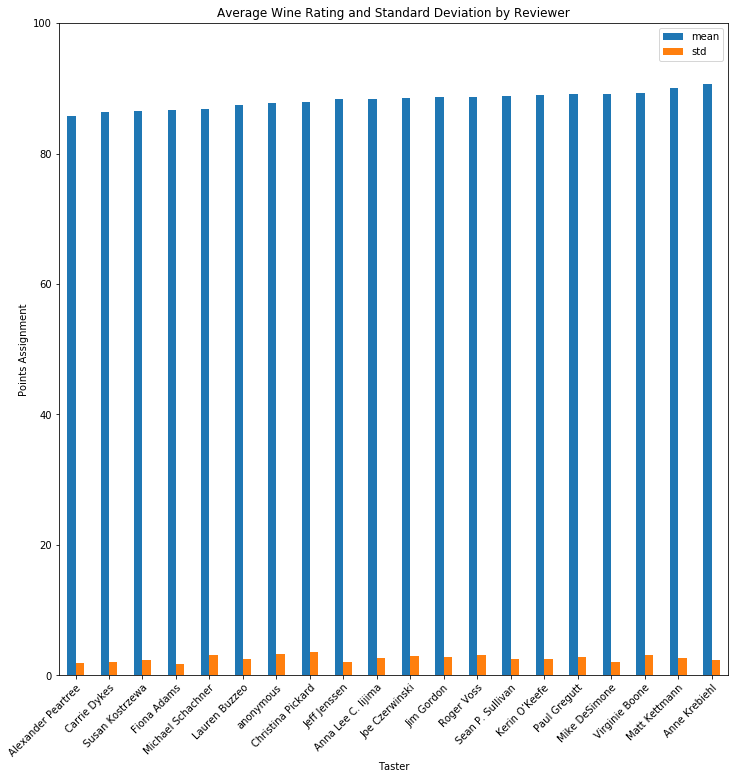

In [42]:
# points by taster
# Use index as X variable from:
# https://stackoverflow.com/questions/20084487/
#       use-index-in-pandas-to-plot-data
# Align x-ticks text from:
# https://stackoverflow.com/questions/28615887/
#       how-to-move-a-ticks-label-in-matplotlib
taster_rating_profile = wine_clean.groupby(
    'taster_name')['points'].agg(['mean', 'std'])
taster_rating_profile.sort_values(by='mean').plot(
    y=['mean', 'std'], kind = 'bar', use_index=True, figsize=(12,12))
plt.ylim(0, 100)
plt.title('Average Wine Rating and Standard Deviation by Reviewer')
plt.xlabel('Taster')
plt.xticks(rotation=45, ha ='right', rotation_mode = 'anchor')
plt.ylabel('Points Assignment');

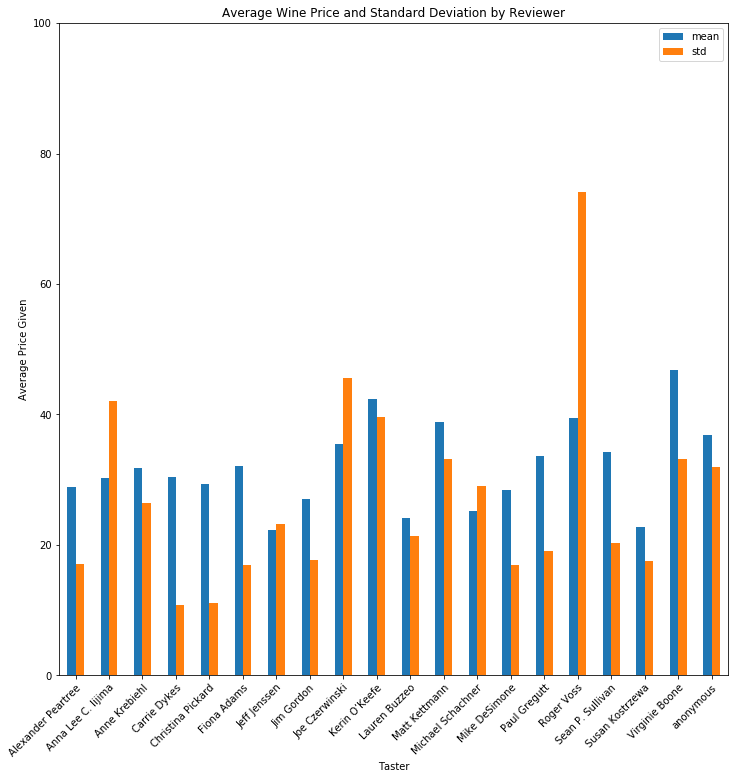

In [43]:
# Price by taster
taster_price_profile = wine_clean.groupby(
    'taster_name')['price'].agg(['mean', 'std'])
taster_price_profile.plot(
    y=['mean', 'std'], kind = 'bar', use_index=True, figsize=(12,12))
plt.ylim(0, 100)
plt.title('Average Wine Price and Standard Deviation by Reviewer')
plt.xlabel('Taster')
plt.xticks(rotation=45, ha ='right', rotation_mode = 'anchor')
plt.ylabel('Average Price Given');

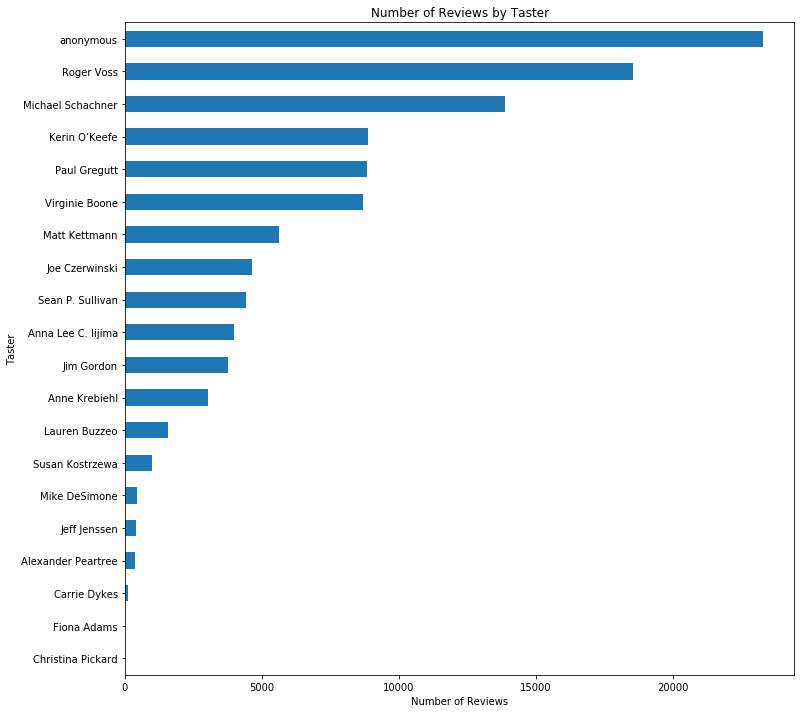

In [44]:
# The above plot seems pretty varied - look at number of reviews, specifically to see
# if Roger Voss has done more.  May want to normalize for that
wine_clean.groupby('taster_name')['price'].count().sort_values().plot(
    kind='barh', figsize=(12,12))
plt.title('Number of Reviews by Taster')
plt.xlabel('Number of Reviews')
plt.ylabel('Taster');

In [45]:
# While Roger Voss has the most - this is also outweighed by the Larger number of
# unknown reviewers

In [46]:
# Now look at price, rating, and count of wines by 'Variety'
# Rating by Variety
variety_rating_profile = wine_clean.groupby(
    'variety')['points'].agg(['mean', 'std'])
variety_rating_profile.sort_values(by='mean')

,mean,std
variety,,
Chancellor,80.500000,0.707107
Airen,81.666667,1.527525
Shiraz-Tempranillo,82.000000,2.828427
Aidani,82.000000,NaN
Picapoll,82.000000,NaN
...,...,...
Riesling-Chardonnay,94.000000,NaN
Bual,94.333333,2.250926
Tinta del Pais,95.000000,1.414214


In [47]:
# Price by Variety
variety_price_profile = wine_clean.groupby(
    'variety')['price'].agg(['mean', 'std'])
variety_rating_profile.sort_values(by='mean')

,mean,std
variety,,
Chancellor,80.500000,0.707107
Airen,81.666667,1.527525
Shiraz-Tempranillo,82.000000,2.828427
Aidani,82.000000,NaN
Picapoll,82.000000,NaN
...,...,...
Riesling-Chardonnay,94.000000,NaN
Bual,94.333333,2.250926
Tinta del Pais,95.000000,1.414214


In [48]:
# Count of each Variety
wine_clean.groupby('variety')['points'].count().sort_values()

variety
Žilavka                         1
Paralleda                       1
Centesimino                     1
Cercial                         1
Cesanese                        1
                            ...  
Bordeaux-style Red Blend     4958
Red Blend                    7800
Cabernet Sauvignon           8761
Chardonnay                  10235
Pinot Noir                  11833
Name: points, Length: 691, dtype: int64

In [49]:
# Looks like there are a lot of varieties that have only been rated once, check how many
# Number of entries per category code from:
# https://stackoverflow.com/questions/29836836/
#         how-do-i-filter-a-pandas-dataframe-based-on-value-counts
print('Number of single-entry varieties: ',
    len(
        wine_clean.groupby('variety').filter(lambda x: len(x) == 1).groupby(
            'variety')['variety']
    )
)
print('Number of multi-entry varieties: ',
    len(
    wine_clean.groupby('variety').filter(lambda x: len(x) > 1).groupby(
        'variety')['variety']
    )
)

Number of single-entry varieties:  145
Number of multi-entry varieties:  546


## 4) Initial Correlation Exploration

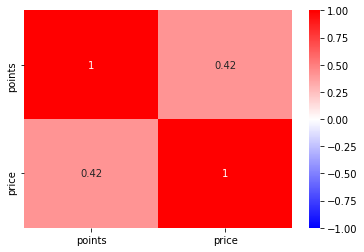

In [50]:
# Look at basic heatmap for Price and Rating
# Heatmap graphic from lecture
sns.heatmap(wine_clean.corr(), cmap = 'bwr', vmin = -1, annot=True);

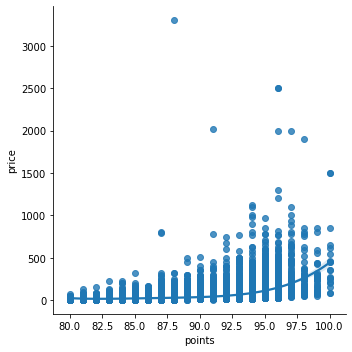

In [51]:
# Get a closer look at this relationship
sns.lmplot(x='points', y='price', data=wine_clean, order=4);

In [52]:
# Preprocessing from:
# http://scikit-learn.org/stable/modules/preprocessing.html
# adjust for mean...Does this work?
#   https://stackoverflow.com/questions/42772758/pandas-groupby-in-combination-with-sklearn-preprocessing
#   http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))


wine_clean['normal_points'] = wine_clean.groupby('taster_name')['points'].transform(
    lambda x: preprocessing.scale((x.astype(float)))
)
wine_clean['scaled_points'] = min_max_scaler.fit_transform(wine_clean[['normal_points']])

wine_clean.drop(columns='normal_points', inplace=True)

In [53]:
wine_clean.describe()

,points,price,scaled_points
count,111537.000000,111537.000000,111537.000000
mean,88.413809,35.626276,50.393887
std,3.099243,42.113062,11.430173
min,80.000000,4.000000,0.000000
25%,86.000000,17.000000,41.982247
50%,88.000000,25.000000,50.007049
75%,91.000000,42.000000,58.359829
max,100.000000,3300.000000,100.000000


In [54]:
wine_clean.corr()

,points,price,scaled_points
points,1.000000,0.416561,0.948793
price,0.416561,1.000000,0.406462
scaled_points,0.948793,0.406462,1.000000


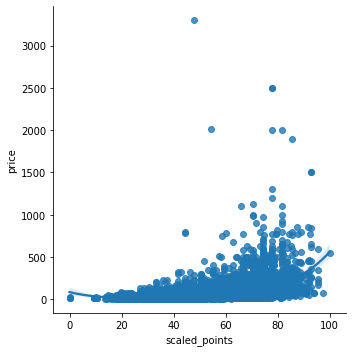

In [55]:
sns.lmplot(x='scaled_points', y='price', data=wine_clean, order=4);

In [56]:
# Categorical correlation Functions
# From: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# And: https://github.com/shakedzy/dython/blob/master/dython/nominal.py

import math
import scipy.stats as ss
from collections import Counter

def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted

def conditional_entropy(x, y):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    :param x: list / NumPy ndarray / Pandas DataFrame
        A sequence of measurements
    :param y: list / NumPy ndarray / Pandas DataFrame
        A sequence of measurements
    :return: float
    """
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy


def cramers_v(x, y):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    Uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328.
    This is a symmetric coefficient: V(x,y) = V(y,x)
    Original function taken from: https://stackoverflow.com/a/46498792/5863503
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    :param x: list / NumPy ndarray / Pandas DataFrame
        A sequence of categorical measurements
    :param y: list / NumPy ndarray / Pandas DataFrame
        A sequence of categorical measurements
    :return: float
        in the range of [0,1]
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def theils_u(x, y):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-categorical association.
    This is the uncertainty of x given y: value is on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    :param x: list / NumPy ndarray / Pandas DataFrame
        A sequence of categorical measurements
    :param y: list / NumPy ndarray / Pandas DataFrame
        A sequence of categorical measurements
    :return: float
        in the range of [0,1]
    """
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


def correlation_ratio(categories, measurements):
    """
    Calculates the Correlation Ration (sometimes marked by the greek letter Eta) for categorical-continuous association.
    Answers the question - given a continuous value of a measurement, is it possible to know which category is it
    associated with?
    Value is in the range [0,1], where 0 means a category cannot be determined by a continuous measurement, and 1 means
    a category can be determined with absolute certainty.
    Wikipedia: https://en.wikipedia.org/wiki/Correlation_ratio
    :param categories: list / NumPy ndarray / Pandas DataFrame
        A sequence of categorical measurements
    :param measurements: list / NumPy ndarray / Pandas DataFrame
        A sequence of continuous measurements
    :return: float
        in the range of [0,1]
    """
    categories = convert(categories, 'array')
    measurements = convert(measurements, 'array')
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta


In [57]:
wine_clean.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'vintage', 'vintage_str_data', 'scaled_points'],
      dtype='object')

In [58]:
# associations between categories and continuous variables: 'eta' values range of 0.0 to 1.0
def store_correlation_ratio(category):
    correlation_list = [
        correlation_ratio(wine_clean[category], wine_clean['points']),
        correlation_ratio(wine_clean[category], wine_clean['scaled_points']),
        correlation_ratio(wine_clean[category], wine_clean['price'])
    ]
    
    print(str(category) + ' association with poiints: ', 
          correlation_list[0])
    print(str(category) + ' association with "scaled" poiints: ', 
          correlation_list[1])
    print(str(category) + ' association with price: ', 
          correlation_list[2])

    return correlation_list

In [59]:
country_correlations = store_correlation_ratio('country')

country association with poiints:  0.052542967658625685
country association with "scaled" poiints:  0.012297139011936653
country association with price:  0.01915324950248344


In [60]:
designation_correlations = store_correlation_ratio('designation')

designation association with poiints:  0.5205972516897167
designation association with "scaled" poiints:  0.5128214314335642
designation association with price:  0.4447792939327246


In [61]:
province_correlations = store_correlation_ratio('province')

province association with poiints:  0.11749269139253968
province association with "scaled" poiints:  0.06665868449298278
province association with price:  0.083881390413612


In [62]:
region_1_correlations = store_correlation_ratio('region_1')

region_1 association with poiints:  0.22548897830854733
region_1 association with "scaled" poiints:  0.19390210451894926
region_1 association with price:  0.31028936358589654


In [63]:
region_2_correlations = store_correlation_ratio('region_2')

region_2 association with poiints:  0.042711462310652565
region_2 association with "scaled" poiints:  0.03604541198852748
region_2 association with price:  0.032287153430236026


In [64]:
taster_correlations = store_correlation_ratio('taster_name')

taster_name association with poiints:  0.08991694663804563
taster_name association with "scaled" poiints:  1.1099640221097632e-30
taster_name association with price:  0.02190771369929919


In [65]:
variety_correlations = store_correlation_ratio('variety')

variety association with poiints:  0.0992906923082972
variety association with "scaled" poiints:  0.08445494750558775
variety association with price:  0.08251439775538863


In [66]:
winery_correlations = store_correlation_ratio('winery')

winery association with poiints:  0.5232313529086722
winery association with "scaled" poiints:  0.49189562632280354
winery association with price:  0.5742454629627854


In [67]:
vintage_correlations = store_correlation_ratio('vintage')

vintage association with poiints:  0.02113417381241989
vintage association with "scaled" poiints:  0.013544369428644681
vintage association with price:  0.03432859637521646


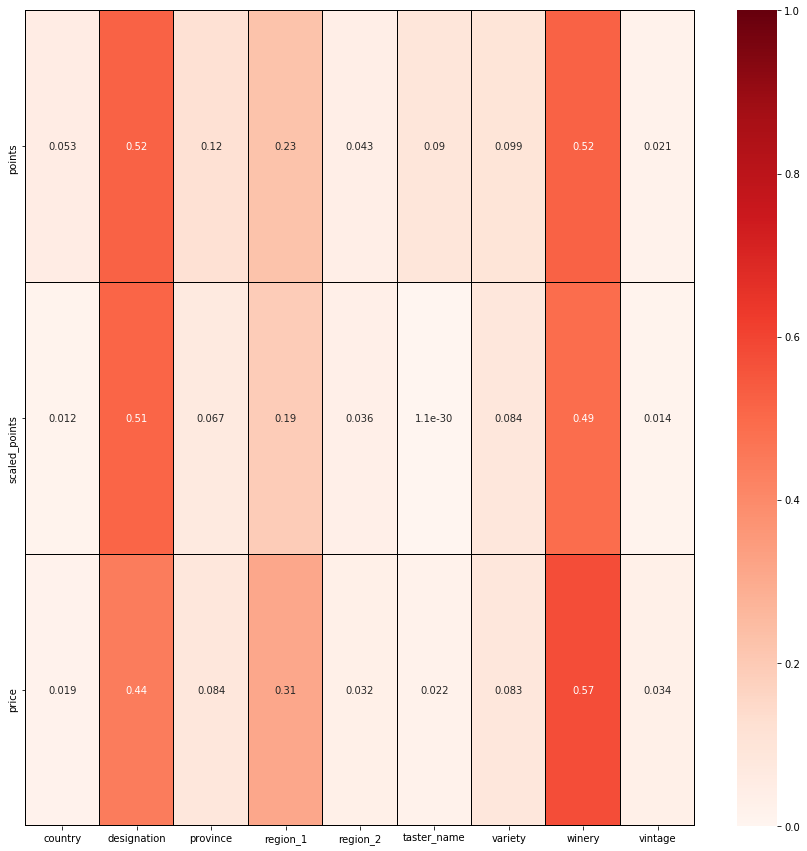

In [68]:
# 'np.column_stack' from:
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
cat_corr_matrix = np.column_stack([country_correlations, 
                                  designation_correlations,
                                  province_correlations,
                                  region_1_correlations,
                                  region_2_correlations,
                                  taster_correlations,
                                  variety_correlations,
                                  winery_correlations,
                                  vintage_correlations])
cat_corr_df = pd.DataFrame(data = cat_corr_matrix, 
                           index=['points', 'scaled_points', 'price'], 
                           columns=['country', 'designation', 'province',
                                    'region_1', 'region_2', 'taster_name',
                                    'variety', 'winery', 'vintage'])

# figsize for heatmap from:
# https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cat_corr_df, cmap='Reds', vmax=1.0, annot=True, 
            linewidths=0.1, linecolor='black', ax=ax);

In [69]:
# Calculate Cramer's V to look at inter-associations
# between the various categories
def store_cramers_v():
    categories = ['country', 'designation', 'province',
                  'region_1', 'region_2', 'taster_name',
                  'variety', 'winery', 'vintage'
                 ]
    cramers_v_list = []
    temp = []
    
    for category_1 in categories:
        for category_2 in categories:
            if category_2 != category_1:
                temp.append(cramers_v(wine_clean[category_1], wine_clean[category_2]))
            else:
                temp.append(1.0)
        cramers_v_list.append(temp)
        temp = []
    
    return cramers_v_list

In [70]:
cramers_v_list = store_cramers_v()

In [71]:
cramers_v_list

[[1.0,
  0.5312780644235205,
  0.9982944332289638,
  0.39843144223710286,
  0.22602305030194683,
  0.5652531638982693,
  0.5037727219418471,
  0.9220805699254722,
  0.054467856725964464],
 [0.5312780644235201,
  1.0,
  0.4955589455796727,
  0.4415190663500753,
  0.4011962037387758,
  0.400282482391937,
  0.41748591119882844,
  0.35020382268091144,
  0.38752120030195375],
 [0.9982944332289638,
  0.49555894557967295,
  1.0,
  0.37263766393473285,
  0.47212777553857627,
  0.7065263494720395,
  0.3435493923237385,
  0.7190938283721235,
  0.14505295932709475],
 [0.39843144223710286,
  0.4415190663500762,
  0.37263766393473297,
  1.0,
  0.9902058304703425,
  0.6005831586735956,
  0.3330123576178299,
  0.5852939053296997,
  0.12084188837369297],
 [0.22602305030194683,
  0.4011962037387761,
  0.4721277755385763,
  0.9902058304703424,
  1.0,
  0.420790927969395,
  0.23599026912319826,
  0.7957648358497477,
  0.054747331582562786],
 [0.5652531638982693,
  0.4002824823919366,
  0.7065263494720395

In [72]:
cat_cat_corr_matrix = np.column_stack(cramers_v_list)
cat_cat_corr_df = pd.DataFrame(data = cat_cat_corr_matrix, 
                           index=['country', 'designation', 'province',
                                    'region_1', 'region_2', 'taster_name',
                                    'variety', 'winery', 'vintage'], 
                           columns=['country', 'designation', 'province',
                                    'region_1', 'region_2', 'taster_name',
                                    'variety', 'winery', 'vintage'])

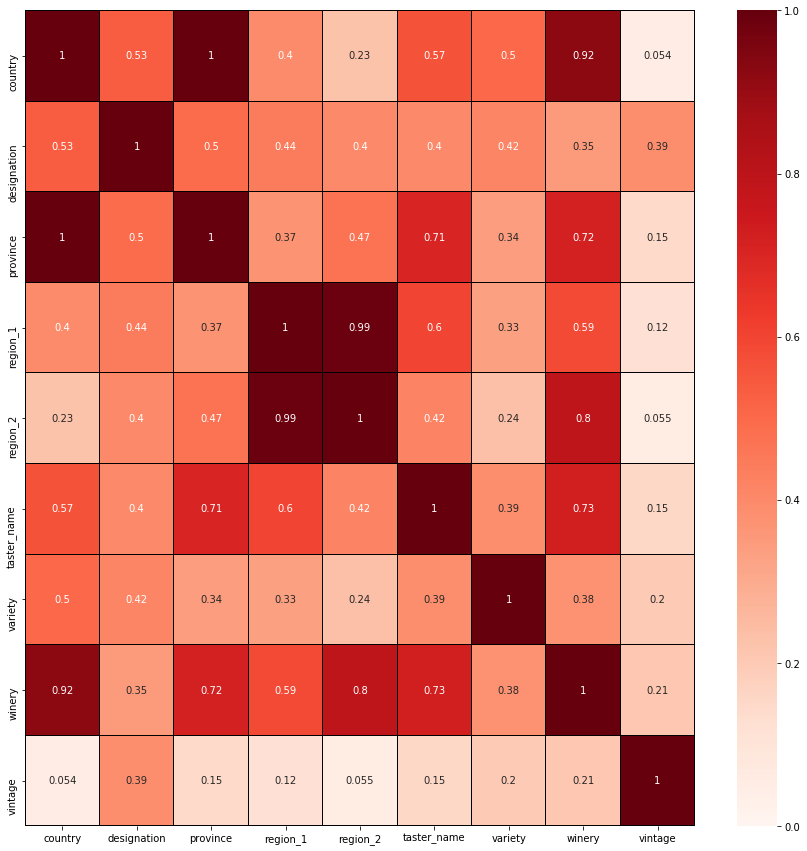

In [73]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cat_cat_corr_df, cmap='Reds', vmin=0.0, vmax=1.0, annot=True, 
            linewidths=0.1, linecolor='black', ax=ax);

In [74]:
# Export cleaned data
# export function:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
wine_clean.to_csv('data/winemag-clean.csv')

### Next Things to look at
1. __Attempt to build a 'random forrest' model to predict price__
1. __Also build one for rating__
1. __Time permitting perform sentiment analysis using text data 'description' column__